### IMPORT LIBR

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import cross_val_score,train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,f1_score,precision_score,recall_score
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB,GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
import warnings
warnings.filterwarnings('ignore')

In [2]:
ipl = pd.read_csv("ipl_matches.csv")

In [3]:
ipl.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [4]:
ipl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   Season           756 non-null    object
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [5]:
ipl.describe()

,id,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,0.025132,13.283069,3.350529
std,3464.478148,0.156630,23.471144,3.387963
min,1.000000,0.000000,0.000000,0.000000
25%,189.750000,0.000000,0.000000,0.000000
50%,378.500000,0.000000,0.000000,4.000000
75%,567.250000,0.000000,19.000000,6.000000
max,11415.000000,1.000000,146.000000,10.000000


In [6]:
ipl.shape

(756, 18)

In [7]:
ipl.size

13608

In [8]:
ipl.isnull().sum()

id                   0
Season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

### DATA CLEANING

In [9]:
ipl = ipl.drop("umpire3",axis=1)

In [10]:
ipl['city']=ipl['city'].fillna("Unknown")
ipl['winner']=ipl['winner'].fillna("Draw Match")
ipl['player_of_match']=ipl['player_of_match'].fillna("Unknown")
ipl['umpire1']=ipl['umpire1'].fillna("Unknown")
ipl['umpire2']=ipl['umpire2'].fillna("Unknown")

In [11]:
ipl["city"].unique()

array(['Hyderabad', 'Pune', 'Rajkot', 'Indore', 'Bangalore', 'Mumbai',
       'Kolkata', 'Delhi', 'Chandigarh', 'Kanpur', 'Jaipur', 'Chennai',
       'Cape Town', 'Port Elizabeth', 'Durban', 'Centurion',
       'East London', 'Johannesburg', 'Kimberley', 'Bloemfontein',
       'Ahmedabad', 'Cuttack', 'Nagpur', 'Dharamsala', 'Kochi',
       'Visakhapatnam', 'Raipur', 'Ranchi', 'Abu Dhabi', 'Sharjah',
       'Unknown', 'Mohali', 'Bengaluru'], dtype=object)

In [12]:
ipl["city"] = ipl["city"].replace("Bengaluru","Bangalore")

In [13]:
ipl["team1"].unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

In [14]:
team_mapping = {
    'Rising Pune Supergiant' : 'Rising Pune Supergiants',
    'Pune Warriors' : 'Rising Pune Supergiants',
    'Delhi Daredevils' : "Delhi Capitals" }

columns = ['team1', 'team2', 'toss_winner', 'winner']

for col in columns :
    ipl[col] = ipl[col].replace(team_mapping)

In [15]:
ipl["team1"].unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiants', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Capitals', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala'], dtype=object)

In [16]:
ipl.drop("id",axis=1,inplace=True)

In [17]:
# Example: Rename values in 'result' column
ipl['result'] = ipl['result'].replace({
    'normal': 1,
    'tie': 0,
    'no result': 0
})

# Check updated unique values
print(ipl['result'].unique())

[1 0]


### EDA

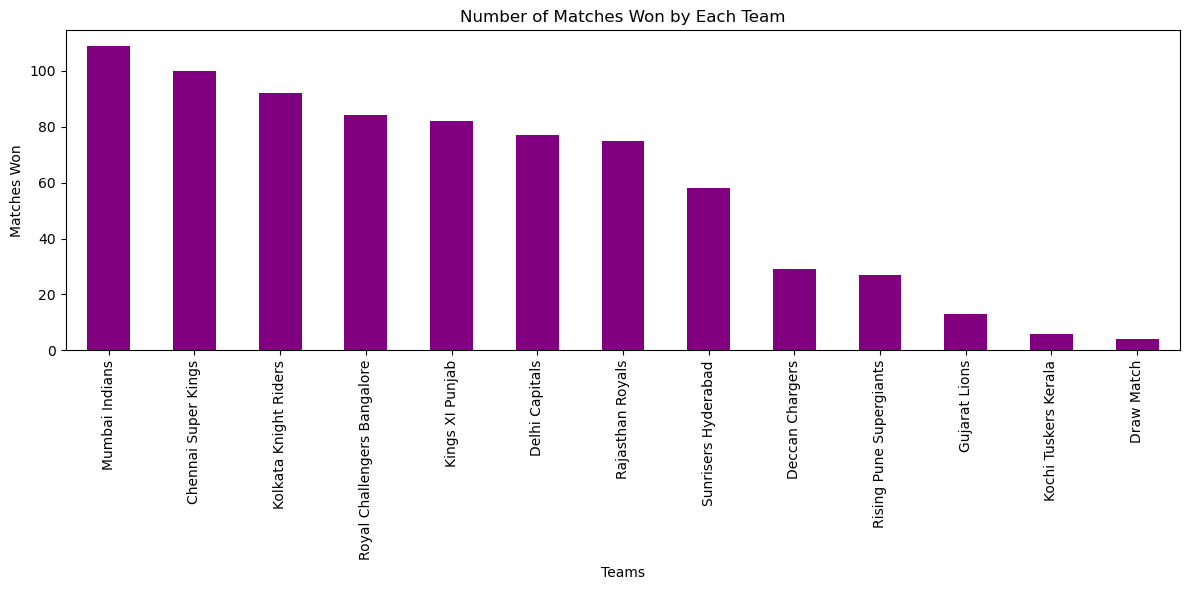

In [18]:
plt.figure(figsize=(12, 6))
ipl['winner'].value_counts().plot(kind='bar', color='Purple')
plt.title('Number of Matches Won by Each Team')
plt.xlabel('Teams')
plt.ylabel('Matches Won')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

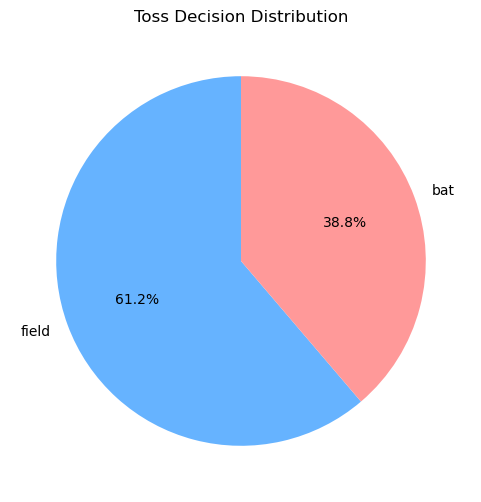

In [19]:
plt.figure(figsize=(6, 6))
toss = ipl['toss_decision'].value_counts()
plt.pie(toss, labels = toss.index,autopct='%1.1f%%',colors=['#66b3ff', '#ff9999'], startangle=90)
plt.title('Toss Decision Distribution')
plt.show()

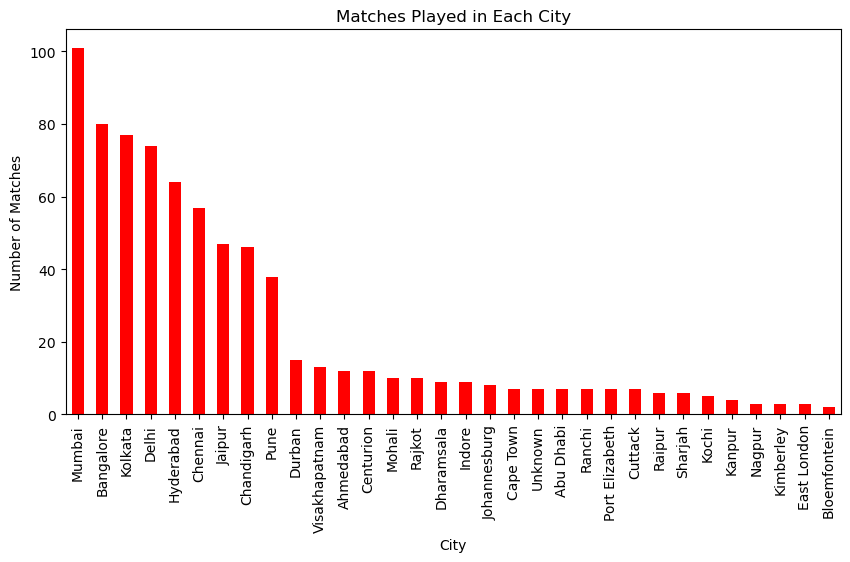

In [20]:
plt.figure(figsize=(10, 5))
ipl['city'].value_counts().plot(kind='bar', color='red')
plt.title('Matches Played in Each City')
plt.xlabel('City')
plt.ylabel('Number of Matches')
plt.xticks(rotation=90)
plt.show()

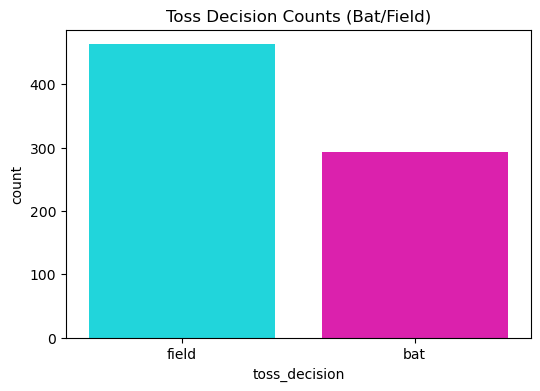

In [21]:
plt.figure(figsize=(6, 4))
sns.countplot(data=ipl,palette=['#02F2FA', '#FA02BD'], x='toss_decision')
plt.title("Toss Decision Counts (Bat/Field)")
plt.show()

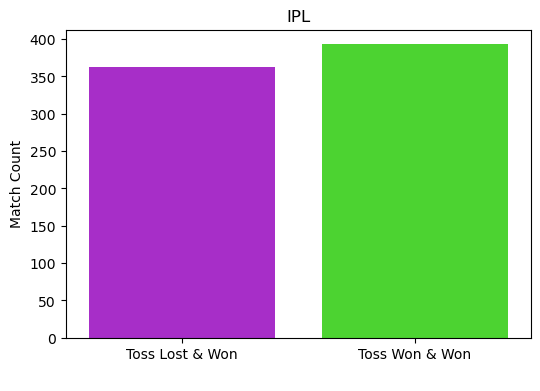

In [22]:
plt.figure(figsize=(6, 4))
sns.countplot(
    x=(ipl['toss_winner'] == ipl['winner']),
    palette=['#B515E1', '#3AEE16']
)
plt.xticks([0, 1], ['Toss Lost & Won', 'Toss Won & Won'])
plt.title("IPL")
plt.ylabel("Match Count")
plt.xlabel(" ")
plt.show()

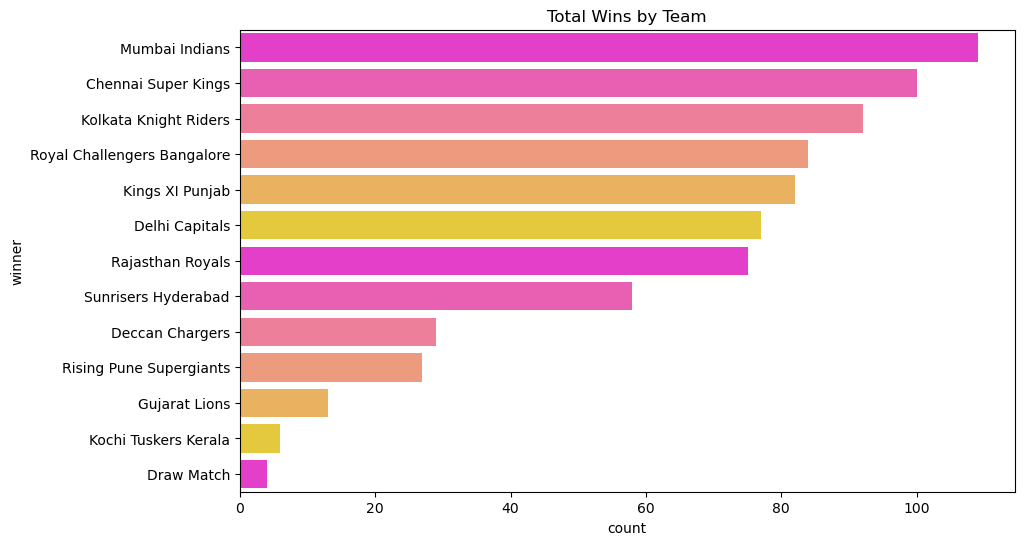

In [23]:
plt.figure(figsize=(10, 6))
sns.countplot(
    y='winner',
    data=ipl,
    order=ipl['winner'].value_counts().index,
    palette=sns.color_palette("spring")
)
plt.title("Total Wins by Team")
plt.show()

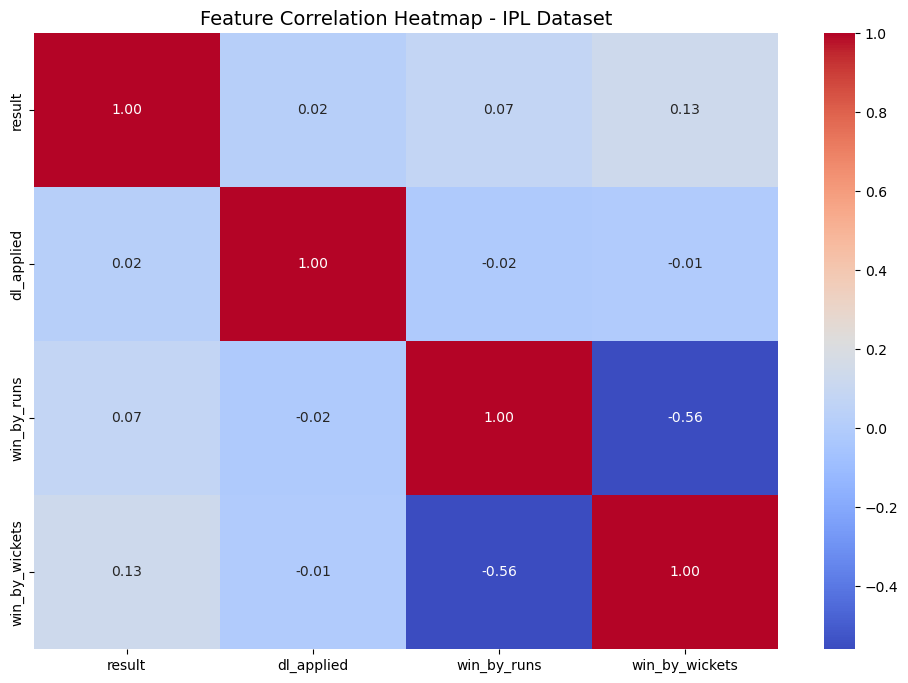

In [24]:
corr_matrix = ipl.select_dtypes(include=['int64','float64']).corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", cbar=True)
plt.title("Feature Correlation Heatmap - IPL Dataset", fontsize=14)
plt.show()

# Data Preprocessing

In [36]:
from sklearn.preprocessing import StandardScaler,LabelEncoder

In [37]:
ipl.head(2)

,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,1,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
1,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiants,Rising Pune Supergiants,field,1,0,Rising Pune Supergiants,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi


In [38]:
label= LabelEncoder()
ipl['team1']=label.fit_transform(ipl['team1'])

In [39]:
label= LabelEncoder()
ipl['team2']=label.fit_transform(ipl['team2'])

In [40]:
label= LabelEncoder()
ipl['toss_winner']=label.fit_transform(ipl['toss_winner'])

In [41]:
label= LabelEncoder()
ipl['toss_decision']=label.fit_transform(ipl['toss_decision'])

In [42]:
label= LabelEncoder()
ipl['result']=label.fit_transform(ipl['result'])

In [43]:
label= LabelEncoder()
ipl['winner']=label.fit_transform(ipl['winner'])

In [44]:
ipl['team1'].unique()

array([11,  7,  3,  9, 10,  6,  2,  4,  0,  8,  1,  5])

In [45]:
ipl.head()

,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,IPL-2017,Hyderabad,05-04-2017,11,10,10,1,1,0,12,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
1,IPL-2017,Pune,06-04-2017,7,9,9,1,1,0,10,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi
2,IPL-2017,Rajkot,07-04-2017,3,6,6,1,1,0,7,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan
3,IPL-2017,Indore,08-04-2017,9,4,4,1,1,0,5,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin
4,IPL-2017,Bangalore,08-04-2017,10,2,10,0,1,0,11,15,0,KM Jadhav,M Chinnaswamy Stadium,Unknown,Unknown


In [46]:
X = ipl[['team1','team2','toss_winner','toss_decision','result','win_by_runs','win_by_wickets']]
y = ipl[['winner']]

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### MODEL TRAINING

### Logistic Regression

In [48]:
Classifier=LogisticRegression()
Classifier.fit(X_train,y_train)

LogisticRegression()

In [49]:
LR = LogisticRegression(max_iter = 1000)
LR.fit(X_train,y_train)
# testing data prediction
y_pred = LR.predict(X_test)

In [50]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [51]:
print("---------------- Logistic Regression -------------------")
print("Logistic Regression Accuracy_score :" ,accuracy_score(y_test,y_pred))
print("Logistic Regression Precision_Score:",precision_score(y_test,y_pred,average='weighted',zero_division=0))
print("Logistic Regression Recall_score:",recall_score(y_test,y_pred,average='weighted',zero_division=0))
print("Logistic Regression F1_score:",f1_score(y_test,y_pred,average='weighted',zero_division=0))

---------------- Logistic Regression -------------------
Logistic Regression Accuracy_score : 0.17105263157894737
Logistic Regression Precision_Score: 0.13979169203372802
Logistic Regression Recall_score: 0.17105263157894737
Logistic Regression F1_score: 0.14505066409166648


### SVM

In [52]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix

In [53]:
ipl.head(1)

,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,IPL-2017,Hyderabad,05-04-2017,11,10,10,1,1,0,12,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong


In [54]:
X = ipl.iloc[:, [3,4,5,6,7,10,11]].values  
y = ipl['winner'].values  

In [55]:
print(X)

[[11 10 10 ...  1 35  0]
 [ 7  9  9 ...  1  0  7]
 [ 3  6  6 ...  1  0 10]
 ...
 [11  2  2 ...  1  0  2]
 [ 2  0  0 ...  1  0  6]
 [ 7  0  7 ...  1  1  0]]


In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [57]:
scaler = StandardScaler()
x_train = scaler.fit_transform(X_train)
x_test = scaler.transform(X_test)

In [58]:
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']   
}
grid_search = GridSearchCV(estimator=SVC(),param_grid=param_grid,cv=5,scoring='accuracy')

grid_search.fit(x_train, y_train)

best_classifier = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)
print("Best CV Score:", grid_search.best_score_)

y_pred = best_classifier.predict(x_test)

Best Parameters: {'C': 100, 'gamma': 'auto', 'kernel': 'rbf'}
Best CV Score: 0.8606738084148423


In [59]:
print("---------------- SVM -------------------")
print("SVM Test Accuracy:", accuracy_score(y_test, y_pred))
print("SVM Precision_Score:",precision_score(y_test,y_pred,average='weighted',zero_division=0))
print("SVM Recall_score:",recall_score(y_test,y_pred,average='weighted',zero_division=0))
print("SVM F1_score:",f1_score(y_test,y_pred,average='weighted',zero_division=0))

---------------- SVM -------------------
SVM Test Accuracy: 0.9417989417989417
SVM Precision_Score: 0.9458453210006004
SVM Recall_score: 0.9417989417989417
SVM F1_score: 0.9410146707864345


### KNN

In [60]:
model= KNN()
model.fit(X_train,y_train)

KNeighborsClassifier()

In [61]:
Classifier=KNN(n_neighbors = 5, metric = 'euclidean')
Classifier.fit(X_train, y_train)
test_predict = Classifier.predict(X_test)                            
k_1 = accuracy_score(test_predict, y_test)

In [62]:
print("----------------KNN-------------------")
print("KNN Accuracy_score :" ,accuracy_score(test_predict, y_test))
print("KNN Precision_Score:",precision_score(test_predict, y_test,average='weighted',zero_division=0))
print("KNN Recall_score:",recall_score(test_predict, y_test,average='weighted',zero_division=0))
print("KNN F1_score:",f1_score(test_predict, y_test,average='weighted',zero_division=0))

----------------KNN-------------------
KNN Accuracy_score : 0.43915343915343913
KNN Precision_Score: 0.4670996417890828
KNN Recall_score: 0.43915343915343913
KNN F1_score: 0.4450679050580452


In [63]:
def Elbow(k):
    test_error = []
    for i in k:
        clf = KNN(n_neighbors = i)
        clf.fit(X_train, y_train)
        tmp = clf.predict(X_test)
        tmp = accuracy_score(tmp, y_test)
        error = 1-tmp
        test_error.append(error)
    return test_error

In [64]:
#define k range
k = range(2,20)

In [65]:
test = Elbow(k)
print(test)

[0.5502645502645502, 0.5661375661375662, 0.5343915343915344, 0.5608465608465609, 0.5502645502645502, 0.5767195767195767, 0.5820105820105821, 0.5873015873015873, 0.6296296296296297, 0.671957671957672, 0.6613756613756614, 0.6613756613756614, 0.6613756613756614, 0.6666666666666667, 0.671957671957672, 0.6878306878306879, 0.6984126984126984, 0.6931216931216931]


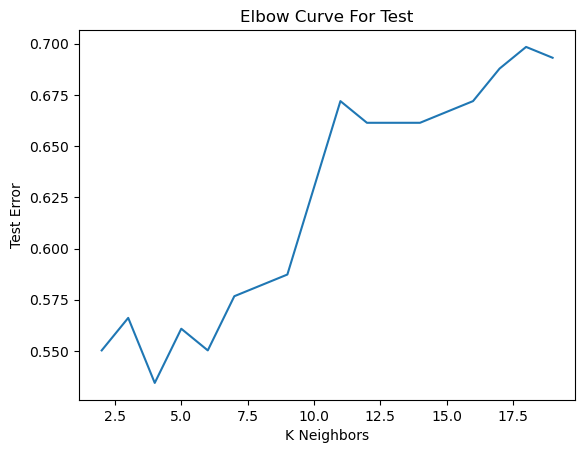

In [66]:
import matplotlib.pyplot as plt
plt.plot(k, test)
plt.xlabel('K Neighbors')
plt.ylabel('Test Error')
plt.title('Elbow Curve For Test')
plt.show()

In [67]:
clf = KNN(n_neighbors = 1)

clf.fit(X_train, y_train)

test_predict = clf.predict(X_test)
k_2 = accuracy_score(test_predict, y_test)

In [68]:
print("Before Elbow Method Knn Score : ", k_1)
print("After Elbow Method to put right K-Value Knn Score : ", k_2)

Before Elbow Method Knn Score :  0.43915343915343913
After Elbow Method to put right K-Value Knn Score :  0.5132275132275133


In [69]:
print("---------------- KNN After Elbow -------------------")
print("KNN Accuracy_score :" ,accuracy_score(test_predict, y_test))
print("KNN Precision_Score:",precision_score(test_predict, y_test,average='weighted',zero_division=0))
print("KNN Recall_score:",recall_score(test_predict, y_test,average='weighted',zero_division=0))
print("KNN F1_score:",f1_score(test_predict, y_test,average='weighted',zero_division=0))

---------------- KNN After Elbow -------------------
KNN Accuracy_score : 0.5132275132275133
KNN Precision_Score: 0.527313582437806
KNN Recall_score: 0.5132275132275133
KNN F1_score: 0.5073438393070594


### Decision Tree

In [70]:
dtree = DecisionTreeClassifier(random_state=100)

In [71]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=100)

In [72]:
y_train_pred = dtree.predict(X_train)
y_test_pred = dtree.predict(X_test)

In [73]:
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

In [74]:
print("Decision Tree Training Accuracy:", train_accuracy)
print("Decision Tree Testing Accuracy :", test_accuracy)

Decision Tree Training Accuracy: 1.0
Decision Tree Testing Accuracy : 0.8888888888888888


In [75]:
print("\n Classification Report (Decision Tree):\n")
print(classification_report(y_test, y_test_pred))


 Classification Report (Decision Tree):

              precision    recall  f1-score   support

           0       0.95      0.91      0.93        23
           1       0.75      0.86      0.80         7
           2       0.82      0.75      0.78        24
           3       0.50      0.50      0.50         2
           4       1.00      1.00      1.00         4
           5       0.83      0.95      0.89        21
           6       1.00      1.00      1.00         1
           7       1.00      0.87      0.93        23
           8       0.92      0.96      0.94        24
           9       0.92      0.92      0.92        12
          10       0.78      0.88      0.82         8
          11       0.88      0.92      0.90        24
          12       0.93      0.88      0.90        16

    accuracy                           0.89       189
   macro avg       0.87      0.88      0.87       189
weighted avg       0.89      0.89      0.89       189



In [80]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [81]:
dt_clf = DecisionTreeClassifier(random_state = 42)

In [82]:
param_grid = {
    'max_depth' : [3, 5, 10, None],
    'criterion' : ['gini', 'entropy']
}

# Grid Search with cross-validation
grid_search = GridSearchCV(estimator=dt_clf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

# Best model 
best_model = grid_search.best_estimator_
print(best_model)

DecisionTreeClassifier(criterion='entropy', random_state=42)


In [84]:
y_pred = best_model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

In [85]:
print("\n--- Results --- ")
print("Best Parameters : ", grid_search.best_params_)
print("Accuracy : ", accuracy)
print("Confusion Matrix :\n ", conf_matrix)
print("\nClassification Report :\n", classification_report(y_test, y_pred))


--- Results --- 
Best Parameters :  {'criterion': 'entropy', 'max_depth': None}
Accuracy :  0.9312169312169312
Confusion Matrix :
  [[22  0  0  0  0  1  0  0  0  0  0  0  0]
 [ 0  6  1  0  0  0  0  0  0  0  0  0  0]
 [ 0  2 19  1  0  1  0  0  0  0  1  0  0]
 [ 0  0  0  1  0  0  0  0  0  0  0  1  0]
 [ 0  0  0  0  4  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1 19  0  0  0  1  0  0  0]
 [ 0  0  0  0  0  0  0  1  0  0  0  0  0]
 [ 0  0  0  0  0  1  0 22  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0 23  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 12  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  8  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 24  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 16]]

Classification Report :
               precision    recall  f1-score   support

           0       0.96      0.96      0.96        23
           1       0.75      0.86      0.80         7
           2       0.95      0.79      0.86        24
           3       0.50      0.50      0.50         2
           4       0.80

In [86]:
print("---------------- Decision Tree -------------------")
print("DTree Accuracy_score  :" ,accuracy_score(y_test, y_pred))
print("DTree Precision_Score :",precision_score(y_test, y_pred,average='weighted',zero_division=0))
print("Dtree Recall_score    :",recall_score(y_test, y_pred,average='weighted',zero_division=0))
print("Dtree F1_score        :",f1_score(y_test, y_pred,average='weighted',zero_division=0))

---------------- Decision Tree -------------------
DTree Accuracy_score  : 0.9312169312169312
DTree Precision_Score : 0.9291767080655968
Dtree Recall_score    : 0.9312169312169312
Dtree F1_score        : 0.9285182294506783


### Random forest

In [87]:
param_grid = {
    'n_estimators' : [50, 100, 200],
    'max_depth' : [None, 10, 20, 30],
    'min_samples_split' : [2, 5, 10],
}

grid_search = GridSearchCV(estimator = RandomForestClassifier(oob_score = True, random_state = 42), param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 2)

grid_search.fit(x_train, y_train)

best_params = grid_search.best_params_
best_rf  = grid_search.best_estimator_

Fitting 3 folds for each of 36 candidates, totalling 108 fits


In [88]:
y_pred = best_rf.predict(x_test)

In [89]:
RandomForestClassifier()

RandomForestClassifier()

In [90]:
best_rf.oob_score_

0.8589065255731922

In [91]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

In [92]:
print("\n--- Results --- ")
print("Best Parameters : ", grid_search.best_params_)
print("Accuracy : ", accuracy)
print("Confusion Matrix :\n ", conf_matrix)
print("\nClassification Report :\n", classification_report(y_test, y_pred))


--- Results --- 
Best Parameters :  {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 200}
Accuracy :  0.9153439153439153
Confusion Matrix :
  [[23  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  5  2  0  0  0  0  0  0  0  0  0  0]
 [ 0  2 19  0  0  3  0  0  0  0  0  0  0]
 [ 0  0  0  1  0  0  0  0  0  0  0  1  0]
 [ 0  0  0  0  4  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 19  0  2  0  0  0  0  0]
 [ 0  0  0  0  0  0  1  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  0 22  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 24  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 12  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  1  6  1  0]
 [ 1  0  0  0  0  0  0  0  0  2  0 21  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 16]]

Classification Report :
               precision    recall  f1-score   support

           0       0.96      1.00      0.98        23
           1       0.71      0.71      0.71         7
           2       0.90      0.79      0.84        24
           3       1.00      0.50      0.67         2
  

In [93]:
print("---------------- Decision Tree -------------------")
print("Random Forest Accuracy_score  :" ,accuracy_score(y_test, y_pred))
print("Random Forest Precision_Score :",precision_score(y_test, y_pred,average='weighted',zero_division=0))
print("Random Forest Recall_score    :",recall_score(y_test, y_pred,average='weighted',zero_division=0))
print("Random Forest F1_score        :",f1_score(y_test, y_pred,average='weighted',zero_division=0))

---------------- Decision Tree -------------------
Random Forest Accuracy_score  : 0.9153439153439153
Random Forest Precision_Score : 0.9190484406322916
Random Forest Recall_score    : 0.9153439153439153
Random Forest F1_score        : 0.9140187029751367


### XG Boost

In [94]:
import xgboost as xgb 

In [95]:
model=xgb.XGBClassifier(n_jobs=-1)

In [96]:
model.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=-1, num_parallel_tree=None, ...)

In [97]:
y_pred=model.predict(x_test)

In [98]:
print("---------------- Decision Tree -------------------")
print("XG_Boost Accuracy_score  :" ,accuracy_score(y_test, y_pred))
print("XG_Boost Precision_Score :",precision_score(y_test, y_pred,average='weighted',zero_division=0))
print("XG_Boost Recall_score    :",recall_score(y_test, y_pred,average='weighted',zero_division=0))
print("XG_Boost F1_score        :",f1_score(y_test, y_pred,average='weighted',zero_division=0))

---------------- Decision Tree -------------------
XG_Boost Accuracy_score  : 0.9735449735449735
XG_Boost Precision_Score : 0.9745957129290462
XG_Boost Recall_score    : 0.9735449735449735
XG_Boost F1_score        : 0.9724945704315607


## Model Comparison:

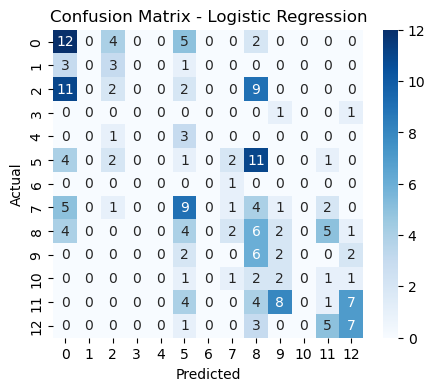

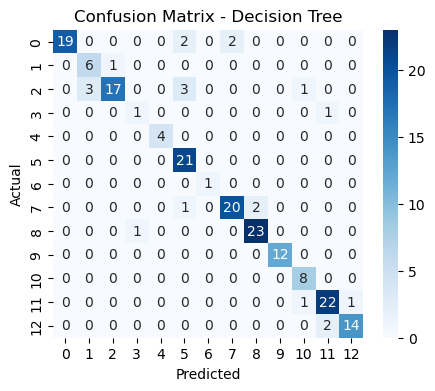

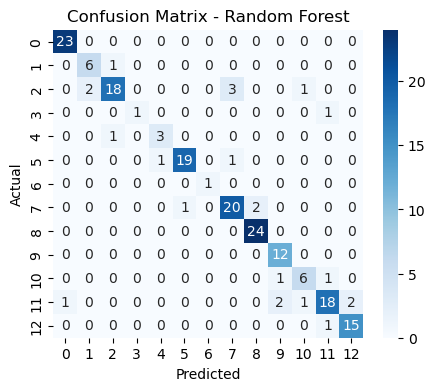

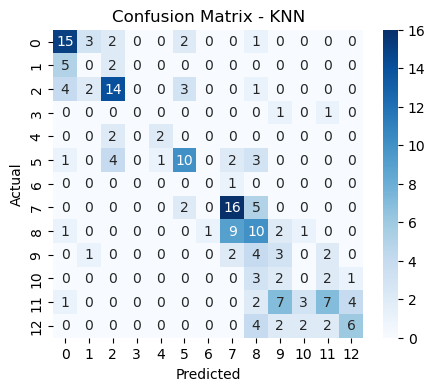

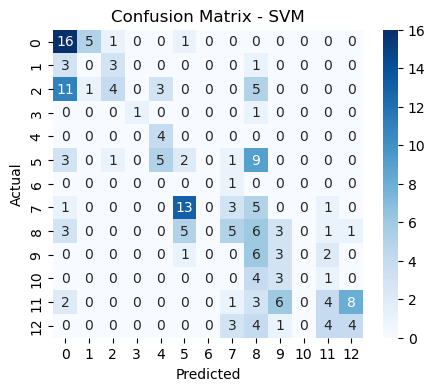

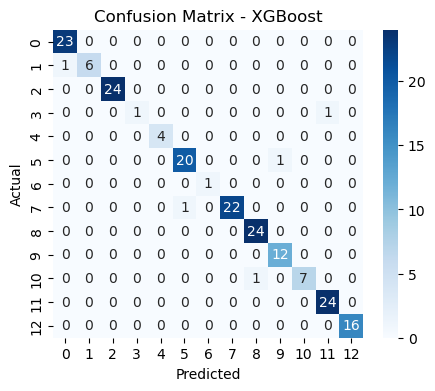

                 Model  Accuracy  Precision    Recall  F1 Score
0  Logistic Regression  0.169312   0.141534  0.169312  0.143970
1        Decision Tree  0.888889   0.900048  0.888889  0.888634
2        Random Forest  0.878307   0.880694  0.878307  0.876034
3                  KNN  0.439153   0.445406  0.439153  0.433239
4                  SVM  0.248677   0.254518  0.248677  0.228124
5              XGBoost  0.973545   0.974596  0.973545  0.972495

Best Performing Model:
 Model         XGBoost
Accuracy     0.973545
Precision    0.974596
Recall       0.973545
F1 Score     0.972495
Name: 5, dtype: object


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

results = []

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)   # train the model
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average="weighted")
    rec = recall_score(y_test, y_pred, average="weighted")
    f1 = f1_score(y_test, y_pred, average="weighted")
    
    results.append([name, acc, prec, rec, f1])
    
    # Confusion Matrix Heatmap
    cm = confusion_matrix(y_test, y_pred)  
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap="Blues")
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# Convert results to DataFrame
results_df = pd.DataFrame(results, columns=["Model", "Accuracy", "Precision", "Recall", "F1 Score"])
print(results_df)

# Best model based on F1 Score
best_model_row = results_df.loc[results_df["F1 Score"].idxmax()]
best_model_name = best_model_row["Model"]
print("\nBest Performing Model:\n", best_model_row)


In [103]:
best_model_name = results_df.loc[results_df["F1 Score"].idxmax(), "Model"]
print("Best Performing Model:", best_model_name)

Best Performing Model: XGBoost


## Hyperparameter Tuning

In [111]:
if best_model_name == "XGBoost":
    param_dist = {
        'n_estimators': [100, 200, 300],
        'max_depth': [3, 5, 7, 10],
        'learning_rate': [0.01, 0.05, 0.1, 0.2],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0]
    }

    random_search = RandomizedSearchCV(
        estimator=XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42),
        param_distributions=param_dist,
        n_iter=30,
        cv=5,
        n_jobs=-1,
        scoring='f1_weighted',
        verbose=2,
        random_state=42
    )

    random_search.fit(X_train, y_train)

    print("Best Parameters:", random_search.best_params_)
    print("Best Cross-Validation Score:", random_search.best_score_)

    best_tuned_model = random_search.best_estimator_

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best Parameters: {'subsample': 1.0, 'n_estimators': 200, 'max_depth': 7, 'learning_rate': 0.2, 'colsample_bytree': 0.8}
Best Cross-Validation Score: 0.9635380927987024


## Compare the performance of all models and justify which model performs the best.

In [112]:
print("========== Final Best Model ==========")
print(f"Selected Model: {best_model_name}")
print("\nPerformance Metrics on Test Data:")
print(f"Accuracy: {best_model_row['Accuracy']:.4f}")
print(f"Precision: {best_model_row['Precision']:.4f}")
print(f"Recall: {best_model_row['Recall']:.4f}")
print(f"F1 Score: {best_model_row['F1 Score']:.4f}")
print("\nThe final model was chosen based on the highest F1 Score,")
print("as F1 balances both precision and recall, making it a reliable metric for imbalanced datasets.")

========== Final Best Model ==========
Selected Model: XGBoost

Performance Metrics on Test Data:
Accuracy: 0.9735
Precision: 0.9746
Recall: 0.9735
F1 Score: 0.9725

The final model was chosen based on the highest F1 Score,
as F1 balances both precision and recall, making it a reliable metric for imbalanced datasets.
